In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
ROOTDIR = Path('/home/virginia/workspace/topic-modeling-study/russian_novels')
NUM_TOPICS = [50, 100, 250, 500]
author_entropy_results = {}
morphology_results = {}
for n in NUM_TOPICS:
    author_entropy_results[n] = ROOTDIR / f'russian_novels_{n}topics_1000iters/russian_novels_{n}topics_1000iters_author_correlation.tsv'
    morphology_results[n] = ROOTDIR / f'russian_novels_{n}topics_1000iters/russian_novels_{n}topics_1000iters_entropy.tsv'


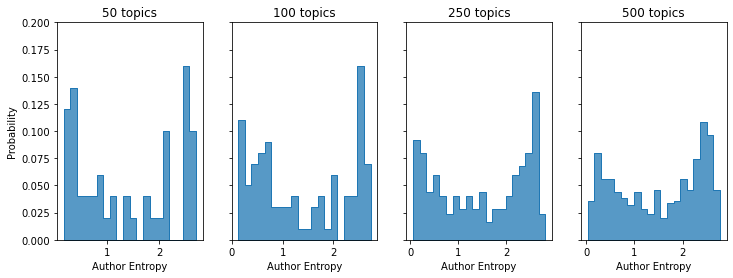

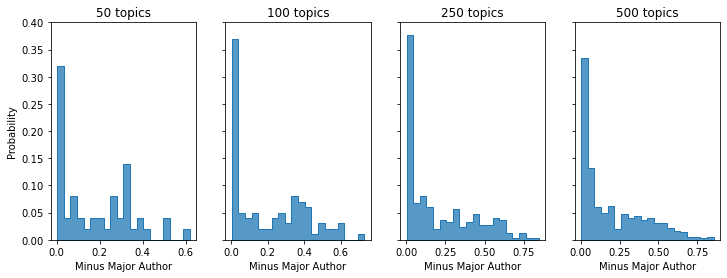

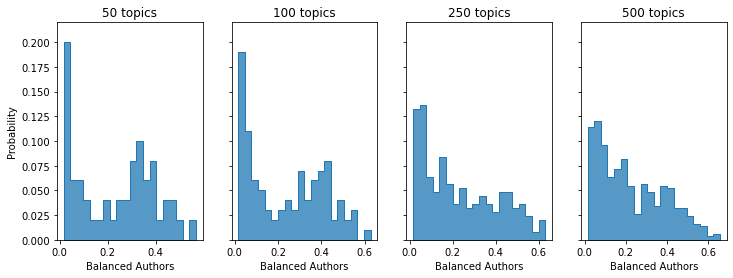

In [38]:

for c in ["Author Entropy", "Minus Major Author", "Balanced Authors"]:
    fig, axs = plt.subplots(ncols=len(NUM_TOPICS))
    fig.set_figwidth(12)
    for i in range(len(NUM_TOPICS)):
        n = NUM_TOPICS[i]
        author_data = pd.read_csv(author_entropy_results[n], sep='\t', encoding='utf-8', index_col=0)
        sns.histplot(author_data[c], ax=axs[i], bins=20, element='step', stat="probability").set(title=f"{n} topics")
        if c=="Author Entropy":
            axs[i].set_ylim([0, 0.2])
        elif c=="Balanced Authors":
            axs[i].set_ylim([0, 0.22])
        else:
            axs[i].set_ylim([0, 0.4])
        if i != 0:
            axs[i].set_ylabel("")
            plt.setp(axs[i].get_yticklabels(), visible=False)
        plt.savefig(c.replace(" ", ""))